In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [2]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = ['DeepNovo', 'PEAKS', 'Novor','DirecTag']
alg_file = ['deepnovo', 'peaks', 'novor','direcTag']

RESULT_DIR = '../../../Data/Analysis_new/'

In [3]:
experiment_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        raw_data =pd.read_csv(
            f"../../../Data/Datasets/{p}/Thermo_SRM_{p}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
            sep='\t', index_col=None)
        pool_dict[alg] = raw_data [['Scan number', 'Identified', 'Sequence']]
    experiment_data_dict[p] = pool_dict



In [4]:
parsed_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        parsed_data = pd.read_csv(f'../../../Data/ParsingResults/{p}/{file}_results_all_sequences.tsv', sep='\t', index_col=None)
        pool_dict[alg] = parsed_data
    parsed_data_dict[p] = pool_dict



In [5]:
scored_data_dict = {}

for p in pools:
    pool_dict = {}
    for alg, file in zip(algorithms, alg_file):
        file = file+'_scored'
        if file == 'direcTag_scored':
            file = file + '_grouped'

        identified_maxquant = pd.read_csv(f'../../../Data/ScoringResults/{p}/{file}.tsv', sep='\t', index_col=None, header=0)
        identified_maxquant['by'] = 'MaxQuant'
        identified_inclusion_list= pd.read_csv(f'../../../Data/ScoringResults_Unidentified/CheckInclusionList/{p}/{file}.tsv', sep='\t', index_col=None, header=0)
        identified_inclusion_list['by'] = 'InclusionList'
        pool_dict[alg] = pd.concat([identified_maxquant, identified_inclusion_list], axis=0)

    scored_data_dict[p] = pool_dict



### Distribution of DeepNovo scores

In [48]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['DeepNovo']
    tmp_df['Pool'] = p
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)
print(df['Score'].describe())

count    88529.000000
mean        -0.257109
std          0.258661
min         -3.280000
25%         -0.410000
50%         -0.190000
75%         -0.030000
max         -0.000000
Name: Score, dtype: float64


### Correlation between DeepNovo score and other Metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


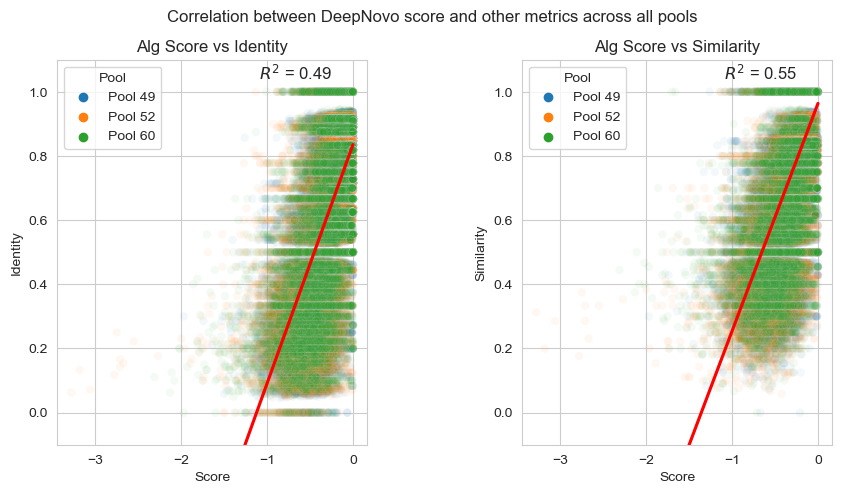

In [49]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['DeepNovo']
    tmp_df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between DeepNovo score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.05)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.05)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'{RESULT_DIR}/DeepNovo/scores_correlation_all_pools.png')
fig.show()

### Distribution of PEAKS scores

In [6]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['PEAKS'].copy()
    tmp_df['Score'] = tmp_df['Score']/100
    tmp_df['Pool'] = p
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)
print(df['Score'].describe())

count    97295.000000
mean         0.833780
std          0.145435
min          0.498750
25%          0.722500
50%          0.882500
75%          0.962222
max          1.000000
Name: Score, dtype: float64


### Correlation between PEAKS score and other Metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


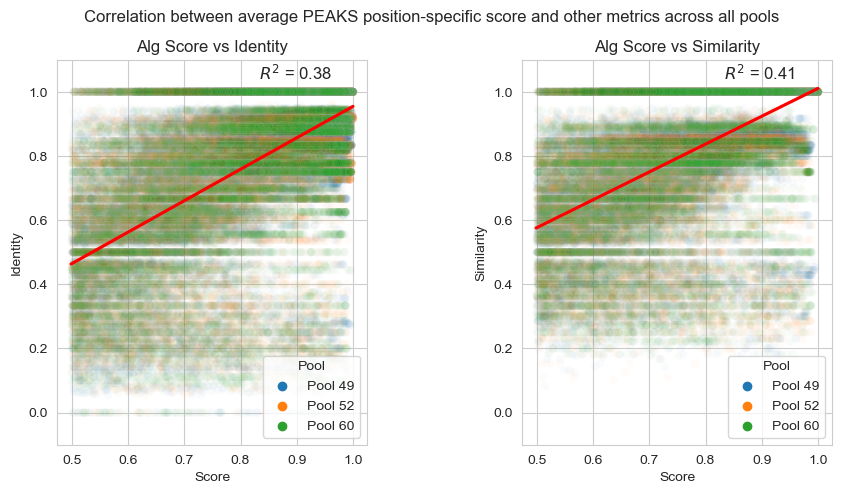

In [7]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['PEAKS'].copy()
    tmp_df['Pool'] = ' '.join(p.split('_'))
    tmp_df['Score'] = tmp_df['Score']/100
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between average PEAKS position-specific score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.025)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.025)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'{RESULT_DIR}/PEAKS/scores_correlation_all_pools.png')
fig.show()

### Distribution of Novor scores

In [52]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['Novor']
    tmp_df['Pool'] = p
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)
print(df['Score'].describe())

count    105050.000000
mean         67.881549
std          25.329010
min           1.500000
25%          50.800000
50%          74.700000
75%          89.800000
max          99.400000
Name: Score, dtype: float64


### Correlation between Novor score and other Metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


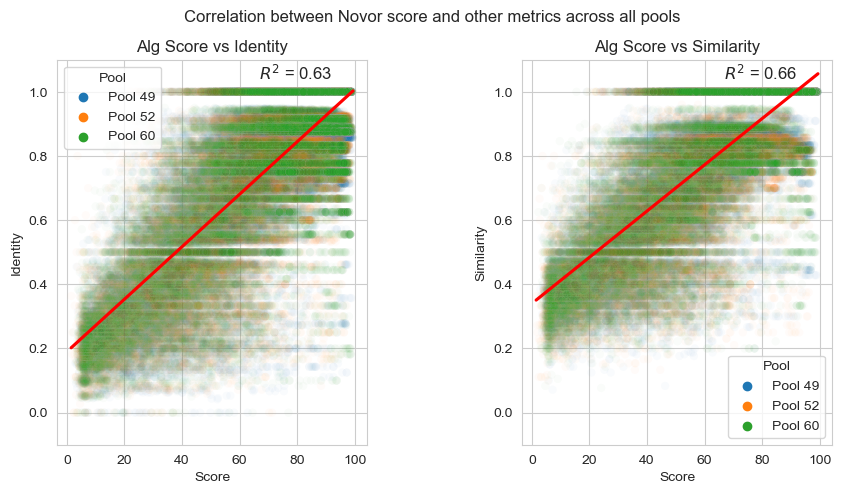

In [53]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['Novor']
    tmp_df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between Novor score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.025)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.025)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'{RESULT_DIR}/Novor/scores_correlation_all_pools.png')
fig.show()

### Distribution of DirecTag scores

In [54]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['DirecTag']
    tmp_df['Pool'] = p
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)
print(df['Score'].describe())

count    111577.000000
mean          0.169123
std           0.586071
min           0.000000
25%           0.000091
50%           0.004769
75%           0.058686
max          15.774095
Name: Score, dtype: float64


### Correlation between DirecTag score and other Metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


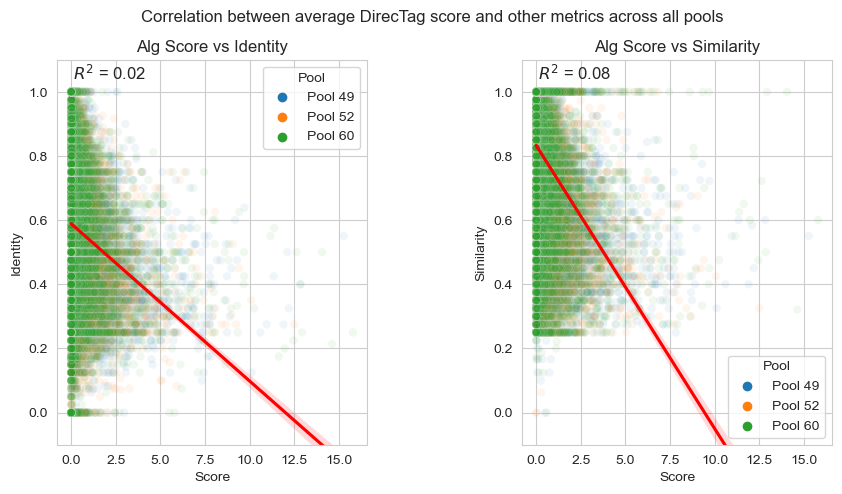

In [55]:
data_frames = []
for p in pools:
    tmp_df = scored_data_dict[p]['DirecTag']
    tmp_df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(tmp_df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between average DirecTag score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.07)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.07)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'{RESULT_DIR}/DirecTag/scores_correlation_all_pools.png')
fig.show()